In [2]:
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.cross_validation import ShuffleSplit
%matplotlib inline

# Load dataset
data = pd.read_csv('housing.csv.xls')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [7]:
# Minimum
min_price = np.min(prices)

# Max
max_price = np.max(prices)

# Mean
mean_price = np.mean(prices)

# Median
median_price = np.median(prices)

# Standard Deviation
std_dev = np.std(prices)

print "Statistics for boston housing dataset ..."
print "Minimum price : ${:,.2f}".format(min_price)
print "Maximum price : ${:,.2f}".format(max_price)
print "Mean price : ${:,.2f}".format(mean_price)
print "Median Price : ${:,.2f}".format(median_price)
print "Standard Deviation Price : ${:,.2f}".format(std_dev)

Statistics for boston housing dataset ...
Minimum price : $105,000.00
Maximum price : $1,024,800.00
Mean price : $454,342.94
Median Price : $438,900.00
Standard Deviation Price : $165,171.13


In [8]:
from sklearn.metrics import r2_score
# preforms preformance calculation on y_predict and y_true values
def performance_metrics(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    
    return score

In [11]:
score = performance_metrics([3, -0.5, 2.0, 7.0, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has coefficient of determination , R^2, of {:,.3f}.".format(score)

Model has coefficient of determination , R^2, of 0.923.


In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 33)

print "Training and Testing split successful"

Training and Testing split successful


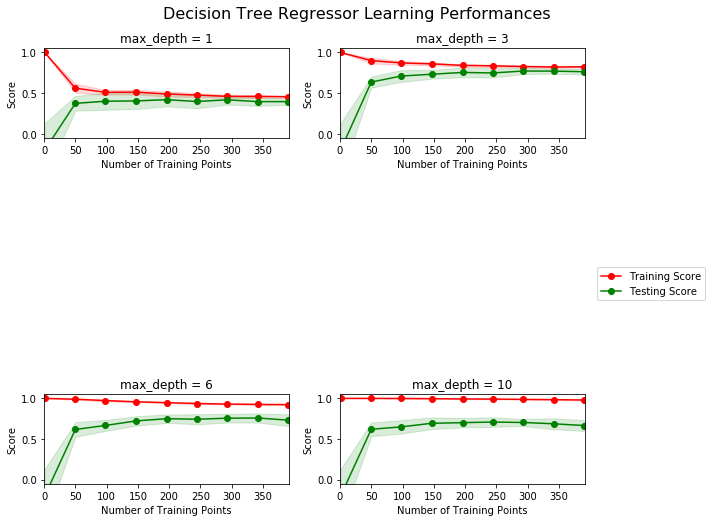

In [13]:
vs.ModelLearning(features, prices)

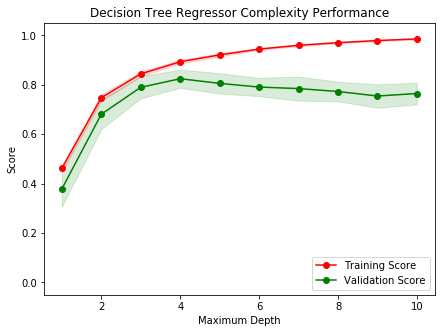

In [14]:
vs.ModelComplexity(X_train, y_train)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor()
    
    params = {'max_depth':range(1,11)}
    
    scoring_fnc = make_scorer(performance_metrics)
    grid = GridSearchCV(regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
    
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [18]:
reg = fit_model(X_train, y_train)
print "Parameter 'max_depth' is {} for optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for optimal model.
